**Loading Tools**

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('clean_resume_data.csv')

In [3]:
dataset.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [4]:
dataset.shape

(2484, 3)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix

Matplotlib is building the font cache; this may take a moment.


**EDA**

In [8]:
dataset['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

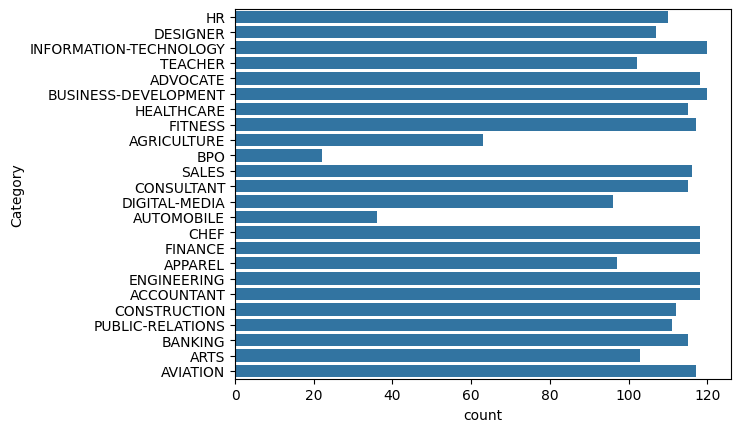

In [10]:
sns.countplot(dataset,y='Category')

As the plot is showing the data is not balanced we need to balance all the categories

**Balancing the dataset**

In [12]:
from sklearn.utils import resample

#First find out the maximum value of category
max_category = dataset['Category'].value_counts().max()

#Now resample the each category to match the maximum count
balanced_data = []
for category in dataset['Category'].unique():
    category_data = dataset[dataset['Category']== category]
    if len(category_data) < max_category:
        balanced_category_data = resample(category_data,replace=True,n_samples=max_category,random_state=42)
    else:
        balanced_category_data = resample(category_data,replace=False,n_samples=max_category,random_state=42)
    balanced_data.append(balanced_category_data)
balanced_df = pd.concat(balanced_data)

In [15]:
balanced_df.head()

,ID,Category,Feature
102,10399912,HR,hr personnel assistant summary u citizen autho...
51,39650734,HR,hr assistant summary hard worker dedicated det...
92,23510685,HR,global hr manager summary global hr profession...
14,27490876,HR,hr coordinator summary applicant screening bac...
106,24402267,HR,designation hr assistant professional summary ...


**Check For Any Null Value**

In [18]:
dataset.isnull().sum()

ID          0
Category    0
Feature     0
dtype: int64

In [17]:
dataset.dropna(inplace=True)

**Making Train Test Split**

In [23]:
x = dataset['Feature']
y = dataset['Category']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

**Encoding (TF-IDF)**

In [24]:
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [25]:
x_train_tfidf

<1986x33844 sparse matrix of type '<class 'numpy.float64'>'
	with 624479 stored elements in Compressed Sparse Row format>

In [35]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train_tfidf,y_train)

#make predictions and find accuracy
y_pred = rf_classifier.predict(x_test_tfidf)
print(f'The accuracy of the model is {accuracy_score(y_test,y_pred)}')

The accuracy of the model is 0.647887323943662


In [29]:
from sklearn.metrics import classification_report

print(f"Classification report is {classification_report(y_test,y_pred)}")

Classification report is                         precision    recall  f1-score   support

            ACCOUNTANT       0.70      0.93      0.80        28
              ADVOCATE       0.88      0.47      0.61        30
           AGRICULTURE       0.25      0.10      0.14        10
               APPAREL       0.67      0.57      0.62        14
                  ARTS       0.25      0.06      0.09        18
            AUTOMOBILE       0.00      0.00      0.00         5
              AVIATION       0.77      0.83      0.80        24
               BANKING       0.55      0.69      0.61        16
                   BPO       0.00      0.00      0.00         3
  BUSINESS-DEVELOPMENT       0.57      0.52      0.55        23
                  CHEF       0.82      0.87      0.84        31
          CONSTRUCTION       0.82      0.84      0.83        32
            CONSULTANT       0.75      0.26      0.39        23
              DESIGNER       0.74      0.89      0.81        19
         DIGIT

c:\Users\YCS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\YCS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\YCS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

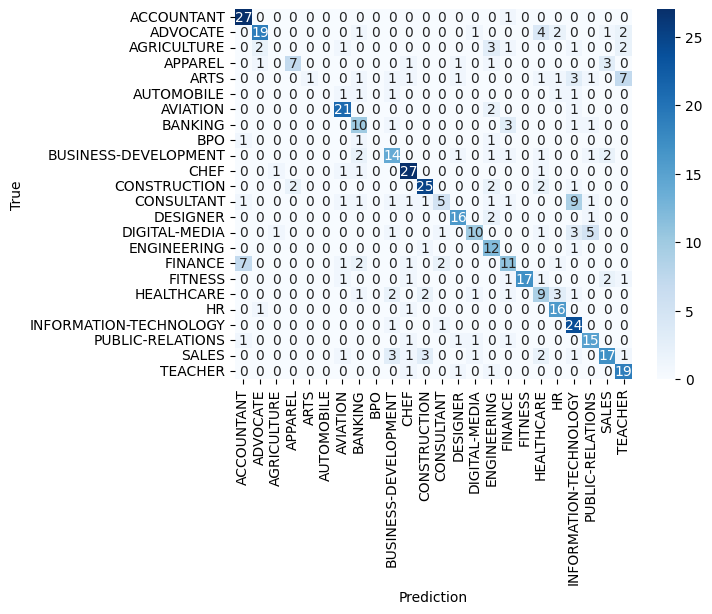

In [42]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues',xticklabels=rf_classifier.classes_,yticklabels=rf_classifier.classes_)
plt.xlabel('Prediction')
plt.ylabel("True")
plt.show()

**Now Create Perdicitve System**

In [43]:
#Predict Category Function
import re
#Create a Clean Function to clean resume data
def clean_resume(txt):
    cleanText = re.sub('http\S+\s'," ",txt)
    cleanText = re.sub('RT|cc'," ",cleanText)
    cleanText = re.sub('#\S+\s'," ",cleanText)
    cleanText = re.sub('@\S+'," ",cleanText)
    cleanText = re.sub('@\S+'," ",cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""")," ",cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]'," ",cleanText)
    cleanText = re.sub('\s'," ",cleanText)
    return cleanText

def predict_cat(inp):
    resume_text = clean_resume(inp)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predict_category = rf_classifier.predict(resume_tfidf)[0]
    return predict_category

<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:10: SyntaxWarning: invalid escape sequence '\]'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:10: SyntaxWarning: invalid escape sequence '\]'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\YCS\AppData\Local\Temp\ipykernel_15968\338768287.py:5: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s'," ",txt)
C:\Users\YCS\AppData\Local\Temp\ipykernel_15968\338768287.py:7: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s'," ",cleanText)
C:\Users\YCS\AppData\Local\Temp\ipykernel_15968\338768287.py:8: SyntaxWarning: invalid escape

In [44]:
#Example Sample
resume_file = """hr assistant summary hard worker dedicated detailed oriented experianced organizerhoghly motivatedmany attributes"""
predict_category_final = predict_cat(resume_file)
print(f"The Prediction is {predict_category_final}")

The Prediction is HR


**Now Save These Files**

In [46]:
import pickle
pickle.dump(rf_classifier,open('models/rf_classifier.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('models/tfidf_vectorizer.pkl','wb'))